In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('zoo.csv')

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
target=data['animal_name']

In [5]:
train=data.drop(columns=['animal_name'])

In [7]:
train.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [9]:
target.isna().sum()

0

In [10]:
target.unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [18]:
train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters=7)
y_predicted = km.fit_predict(data[['airborne','predator']])
y_predicted

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 2, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 3, 0, 2, 2, 0, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 3, 1, 2, 0, 1, 2], dtype=int32)

In [53]:
import numpy as np
np.unique(y_predicted)

array([0, 1, 2, 3], dtype=int32)

In [54]:
data['cluster']=y_predicted


In [55]:
km.cluster_centers_

array([[-1.66533454e-16,  1.00000000e+00],
       [-1.38777878e-16, -3.33066907e-16],
       [ 1.00000000e+00, -2.22044605e-16],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00]])

In [58]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['airborne','predator']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [59]:
sse

[43.24752475247524,
 16.702777777777776,
 4.958333333333334,
 1.3536976393109003e-29,
 1.3536976393109003e-29,
 1.3536976393109003e-29,
 1.3536976393109003e-29,
 1.20647955436194e-29,
 1.20647955436194e-29]

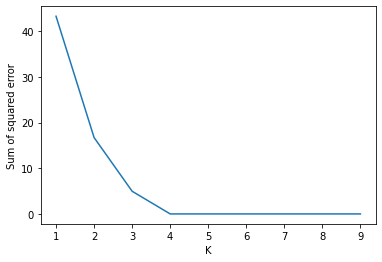

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [61]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['airborne','predator']])
y_predicted

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 2, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 3, 0, 2, 2, 0, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 3, 1, 2, 0, 1, 2], dtype=int32)

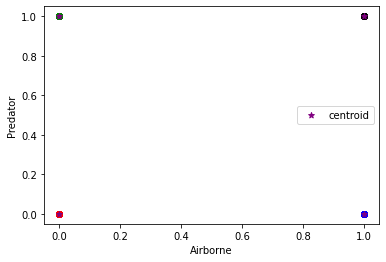

In [62]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]

plt.scatter(df1['airborne'],df1['predator'],color='green')
plt.scatter(df2['airborne'],df2['predator'],color='red')
plt.scatter(df3['airborne'],df3['predator'],color='blue')
plt.scatter(df4['airborne'],df4['predator'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Airborne')
plt.ylabel('Predator')
plt.legend()